# Project: Investigate a Dataset - [Global Vaccinations Data Analysis]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Data Analysis: Researh Question 1</a></li>
<li><a href="#eda2">Data Analysis: Researh Question 2</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Question(s) for Analysis
>**Question 1: How does vaccine effectiveness, safety, and importance compare to the actual vaccination rates in 2017?

>**Question : How have vaccination rates changed in the United States from 1979-2018?

### Dataset Description 

> The four datasets were downloaded from gapminder at https://www.gapminder.org/data/. The vaccination safety dataset contains the proportion of people who think vaccines are not safe. Similarly, the vaccination importance and vaccination effectiveness datasets contain the proportions of people who think vaccines are not important and not effective respectively. All three data sets have the same column names: country, 2014, 2015, 2016, 2017. The fourth data set contains the share of one year olds who have had at least one dose of either BCG, DPT3, HepB3, HIB3, Measles, PCV3, Pol3, or RotaC. This data shows the number for the vaccine with the highest coverage. This data set has column names for every year from 1979-2018 and also a country column.

In [6]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

In [171]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling

>> There was only data from 2015-2017 for the vaccine importance, safety, and effectiveness data sets and most 
countries only had data from 2017. The data from 2014-16 was dropped and only the data from 2017 was used for data analysis. Although there was data from 1979-2018 for the vaccination rate data, I chose to only compare the vaccination rates from 2017 to the responses rates from the vaccine effectiveness, safety and importance datasets. All null value data was dropped and the four datasets were merged into a single dataframe. Then, I subtracted the proportions of the vaccination safety, importance, and effectiveness data from 100 to model the proportion of people who do think that vaccines are safe, effective, and important.

>>For question 2, only the data from the United States was selected. All null values were dropped and the country column was eliminated because it contained no actual data.

In [7]:
def csv_load(filepath):
    df=pd.read_csv(filepath)
    return df
v_imptn = csv_load("vccine_imptn_dag.csv")
v_sfty = csv_load("vccin_sfty_dag.csv")
v_effect = csv_load("vccin_effect_dag.csv")
v_rate = csv_load("vacc_rate.csv")

In [8]:
#Selecting the values for only 2017, removing null values from the vaccination safety data, renaming the column
v_safety = v_sfty[["country", "2017"]].dropna()
v_safety = v_safety.rename(columns={"2017": "safe"})

In [9]:
#Selecting the values for only 2017, removing null values from the vaccination importance data, renaming the column
v_important = v_imptn[["country", "2017"]].dropna()
v_important = v_important.rename(columns={"2017": "important"})

In [10]:
#Selecting the values for only 2017, removing null values from the vaccination effectiveness data, renaming the column
v_effective = v_effect[["country", "2017"]].dropna()
v_effective = v_effective.rename(columns={"2017": "effective"})

In [11]:
#Selecting the values for only 2017, and renaming the column for the vaccination rate data
v_rate17 = v_rate[["country", "2017"]].dropna()
v_rate17 = v_rate17.rename(columns={"2017": "vaccination_rate"})

In [12]:
#Create a merged dataframe of the four datasets
df1 = pd.merge(v_safety, v_important)
df2 = pd.merge(df1, v_effective)
df = pd.merge(df2, v_rate17)
df = df.dropna()
print(df)

                    country  safe  important  effective  vaccination_rate
0               Afghanistan   4.5        2.1        1.8                78
1                   Albania  15.8        1.7        9.0                99
2      United Arab Emirates   4.4        2.5        3.4                99
3                 Argentina   4.8        1.2        2.9                99
4                   Armenia  20.6       12.2       12.5                99
5                 Australia   6.9        3.3        4.1                95
6                   Austria  21.1       11.8       11.3                94
7                Azerbaijan  11.2        8.3        8.4                97
8                   Burundi   6.5        0.7        3.5                92
9                   Belgium  20.6        4.7        5.3                98
10                    Benin  14.0        1.8        6.6                89
11             Burkina Faso  20.8        2.9        8.6                98
12               Bangladesh   0.9     

In [13]:
#Reverse the percentange of the vaccination safety, effectiveness, and importance data to match the vaccination rate data
df.loc[:, "safe"] = df["safe"].apply(lambda x: 100-x)
df.loc[:, "effective"] = df["effective"].apply(lambda x: 100-x)
df.loc[:, "important"] = df["important"].apply(lambda x: 100-x)
print(df)

                    country  safe  important  effective  vaccination_rate
0               Afghanistan  95.5       97.9       98.2                78
1                   Albania  84.2       98.3       91.0                99
2      United Arab Emirates  95.6       97.5       96.6                99
3                 Argentina  95.2       98.8       97.1                99
4                   Armenia  79.4       87.8       87.5                99
5                 Australia  93.1       96.7       95.9                95
6                   Austria  78.9       88.2       88.7                94
7                Azerbaijan  88.8       91.7       91.6                97
8                   Burundi  93.5       99.3       96.5                92
9                   Belgium  79.4       95.3       94.7                98
10                    Benin  86.0       98.2       93.4                89
11             Burkina Faso  79.2       97.1       91.4                98
12               Bangladesh  99.1     

In [14]:
#For Question 2 dataset:
#Select the row of vaccination rate data for the US only
US = v_rate.loc[[181]]
#Delete the country column
del US["country"]
print(US)

     1979  1980  1981  1982  1983  1984  1985  1986  1987  1988  ...   2009  \
181  96.0  97.0  97.0  98.0  98.0  97.0  97.0  97.0  98.0  94.0  ...   95.0   

     2010  2011  2012  2013  2014  2015  2016  2017  2018  
181    96    94    94    95    95    95    95    94    95  

[1 rows x 40 columns]


<a id='eda'></a>
### Research Question 1: 
How does vaccine effectiveness, safety, and importance compare to the actual vaccination rates in 2017?

In [16]:
print(df.describe())

             safe   important   effective  vaccination_rate
count  140.000000  140.000000  140.000000        140.000000
mean    90.731429   96.960714   94.125714         93.171429
std      5.914925    2.421507    3.876165          7.907689
min     66.700000   87.800000   72.400000         50.000000
25%     87.475000   95.675000   92.300000         92.750000
50%     91.700000   97.700000   94.800000         96.000000
75%     95.200000   98.725000   96.800000         98.000000
max     99.400000   99.900000   99.600000         99.000000


In [17]:
# stats t-tests comparing vaccination rate data to vaccine safety, effectiveness, and importance respectively
t1 = stats.ttest_ind(df['vaccination_rate'],df['safe'])
t2 = stats.ttest_ind(df['vaccination_rate'],df['effective'])
t3 = stats.ttest_ind(df['vaccination_rate'],df['important'])
print(t1, t2, t3)

Ttest_indResult(statistic=2.9235578019511608, pvalue=0.003745321113052594) Ttest_indResult(statistic=-1.2821361704934902, pvalue=0.20086303500399041) Ttest_indResult(statistic=-5.4213619354965186, pvalue=1.284641837855238e-07)


<a id='eda'></a>
A series of t-tests were conducted to determine if there is a relationship between the vaccination rate data and the vaccine safety, importance, and effectiveness data. 

In [ ]:
# reshape the dataframe suitable for boxplot
df_melt = pd.melt(df.reset_index(), id_vars=['country'], value_vars=['safe', 'effective', 'important', 'vaccination_rate'])
# replace column names
df_melt.columns = ['country', 'category', 'value']

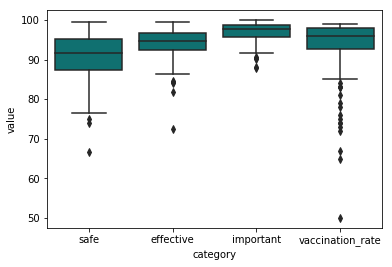

In [18]:
ax = sns.boxplot(x='category', y='value', data=df_melt, color='teal')
plt.show()

<a id='eda1p'></a> 
Research Question 1 Plot summary:
The data had to be reshaped to create a boxplot, which clearly depicts the means and quartiles for all four categories of data. It also shows that there are some outliers for some of the data, particularly in the vaccination_rate boxplot. This suggests that further analysis could be done to explore why there are more outliers in the vaccination_rate category. 

<a id='eda2'></a> 
### Research Question 2: 
How have vaccination rates in the United States changed over the years?

In [22]:
#Transpose the US data to create a plot
USt = US.transpose()
print(USt)

       181
1979  96.0
1980  97.0
1981  97.0
1982  98.0
1983  98.0
1984  97.0
1985  97.0
1986  97.0
1987  98.0
1988  94.0
1989  90.0
1990  87.0
1991  83.0
1992  88.0
1993  94.0
1994  95.0
1995  95.0
1996  96.0
1997  96.0
1998  96.0
1999  94.0
2000  94.0
2001  94.0
2002  96.0
2003  96.0
2004  96.0
2005  96.0
2006  96.0
2007  96.0
2008  95.0
2009  95.0
2010  96.0
2011  94.0
2012  94.0
2013  95.0
2014  95.0
2015  95.0
2016  95.0
2017  94.0
2018  95.0


In [186]:
#Compute the statistics for the US data
print(USt.describe())

             181
count  40.000000
mean   94.750000
std     2.976403
min    83.000000
25%    94.000000
50%    95.000000
75%    96.000000
max    98.000000


In [187]:
#Compute the median of the US data
print(USt.median())

181    95.0
dtype: float64


<a id='eda2'></a> 
A statistical summary and the median were computed for the data to determine if the data was skewed in any way. 

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39],
 <a list of 40 Text xticklabel objects>)

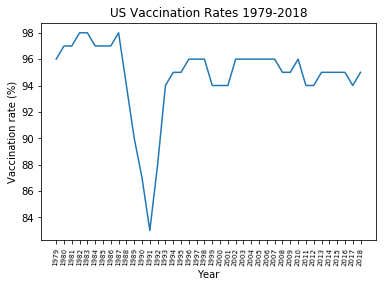

In [25]:
#Create plot of US vaccination data
plt.plot(USt)
plt.title("US Vaccination Rates 1979-2018")
plt.xlabel("Year")
plt.ylabel("Vaccination rate (%)")
plt.xticks(rotation=85, fontsize='7')

<a id='eda2'></a> 
Research Question 2 Plot summary: The US vaccination rate plot clearly depicts the trends in US vaccination rates from 1979-2018. It can be clearly seen that there was a consistent drop in vaccination rates from 1988-1991.

<a id='conclusions'></a>
## Conclusions

> Question 1: The p-values from two of the t-tests were lower than 0.01. This indicates that none of the responses the the vaccine safety and importance data directly impacted the vaccination rates in 2017. When the vaccine effectiveness data was compared to the vaccination rate data via t-test, the p-value result was 0.2. This indicates that there is a small chance of there being a relationship between the two datasets; however, this study would need to be repicated over other years and have similar results in order for this to be confirmed.
The standard deviation for the vaccination rate by country was higher than the standard deviations of the rest of the data showing that vaccination rates vary more by country than do the proportions of people who find them safe, important, and effective. The means for the vaccine importance and effectiveness data were also higher than the actual vaccination rate data. Both the means and standard deviation results could be the result of a lack of access to vaccinations in certain countries. Further analysis could be done to compare vaccination rates to poverty rates, GDP or income by country.

> Question 2: The US vaccination rate has decreased from 1979-2018 overall. The median is slightly lower than the mean of the data which indicates a left skew. This is likely due to the continuous drop in vaccination rates from 1987-1992 as dipicted in the US vaccination rates plot. The max vaccination rate in the US was 98% and the min was 83%.

### Limitations
> One limitation of this dataset used in question 1 is that only one vaccine is counted in the vaccination rate and that vaccine varies by country. This is not a good indication of vaccination rates of all childhood vaccines that are supposed to be administered by age one.


In [26]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0